# Ejercicio 1

## 1.a

In [1]:
tiempos_entre_arribos_file = open('datosTP2EJ1.txt', 'r')

In [2]:
tiempos_entre_arribos = tiempos_entre_arribos_file.readlines()

tiempos_entre_arribos = [float(t.rstrip()) for t in tiempos_entre_arribos]

tam_muestra = len(tiempos_entre_arribos)
# tiempos_entre_arribos

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as sp

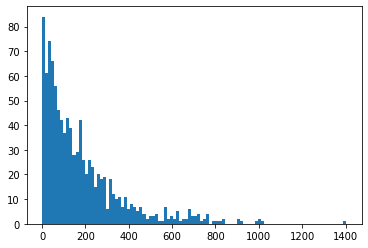

In [4]:
# grafico un histograma para ver que distribucion siguen los valores de la muestra
plt.hist(tiempos_entre_arribos, 100)
plt.show()

In [5]:
# calculo la media de la muestra para saber cual de las dos propuestas se asemeja mas a la
# distribucion de la muestra
np.mean(tiempos_entre_arribos)

180.62767

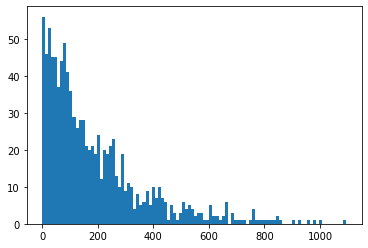

186.93686232078457

In [6]:
# otra forma de decidir cual de las dos propuestas se asemeja mas a la distribucion de la muestra es
# aplicar un test de Kolmogorov-Smirnov (ya que la distribucion es continua) a la muestra


# Verifico que parametros pasar a la funcion expon de scipy para obtener la distribución deseada

# Propuesta 1: exponencial con media 180
muestra_propuesta1 = sp.expon.rvs(0, 180, size=tam_muestra)

# chequeo que la districion sea la esperada
plt.hist(muestra_propuesta1, 100)
plt.show()

np.mean(muestra_propuesta1)

In [7]:
# Aplicamos el test
D2, p = sp.kstest(tiempos_entre_arribos, 'expon', args=(0, 180), N=tam_muestra)
print('D^2:', D2, 'p:', p)

# como p = 0.57 es mayor a 0.01 no rechazamos H0 (que dice que ambas distribuciones son idénticas). Es decir,
# la muestra dada sigue una distribucion exponencial de media 180

D^2: 0.024730781065291363 p: 0.5735940033913054


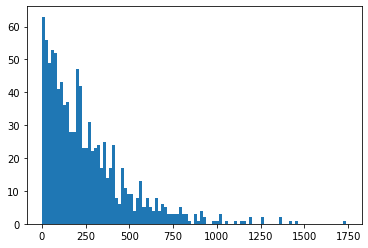

256.518821609046

In [8]:
# Propuesta 2: exponencial con media 240
muestra_propuesta2 = sp.expon.rvs(0, 240, size=tam_muestra)

# chequeo que la districion sea la esperada
plt.hist(muestra_propuesta2, 100)
plt.show()

np.mean(muestra_propuesta2)

In [9]:
D2, p = sp.kstest(tiempos_entre_arribos, 'expon', args=(0, 240), N=tam_muestra)
print('D^2:', D2, 'p:', p)

# como p = 3.95e-12 es menor a 0.01 rechazamos H0 (que dice que ambas distribuciones son idénticas). Es decir,
# la muestra dada no sigue una distribucion exponencial de media 240

D^2: 0.1157527363264863 p: 3.9547796943643075e-12


## 1.b

In [10]:
class Cajero:
    def __init__(self):
        self.capacidad = 2000
        self.compartimiento_entregar = self.capacidad
        self.compartimiento_depositar = 0

    def depositar(self, cantidad):
        if self.compartimiento_entregar + self.compartimiento_depositar + cantidad <= self.capacidad:
            self.compartimiento_depositar += cantidad
            return True
        return False

    def retirar(self, cantidad):
        if self.compartimiento_entregar - cantidad >= 0:
            self.compartimiento_entregar -= cantidad
            return True
        return False

    def get_cantidad_billetes_actual(self):
        return self.compartimiento_entregar + self.compartimiento_depositar


In [11]:
from random import random, uniform


cantidad_de_billetes = []
t_en_el_sistema = []
cantidad_transacciones = 0
cantidad_clientes = 0

dia = 24*60*60
for i in range(1000):
    cajero = Cajero()
    # t: tiempo acumulado
    t = 0
    
    if i == 700:
        cantidad_de_billetes.append(cajero.get_cantidad_billetes_actual())

    while t <= dia:
        # arribo un cliente: tiempo entre clientes sigue una distribucion exponencial de media 180
        t1 = sp.expon.rvs(0, 180)
        t += t1
        # u: para decidir si el cliente que arribo es del grupo 1 o grupo 2
        u = random()
        if u <= 0.75: # grupo 1
            # el cliente usa el cajero
            t2 = sp.expon.rvs(0, 90)
            t_en_el_sistema.append(t2)
            t += t2
            # el cliente retira dinero
            cantidad_a_retirar = uniform(3, 50)
            pudo_retirar = cajero.retirar(cantidad_a_retirar)
            if pudo_retirar:
                cantidad_transacciones += 1
        else: # grupo 2
            # el cliente usa el cajero
            t2 = sp.expon.rvs(0, 300)
            t_en_el_sistema.append(t2)
            t += t2
            # el cliente deposita dinero
            cantidad_a_depositar = uniform(10, 100)
            pudo_depositar = cajero.depositar(cantidad_a_depositar)
            if pudo_depositar:
                cantidad_transacciones += 1

        cantidad_clientes += 1
        if i == 700:
            cantidad_de_billetes.append(cajero.get_cantidad_billetes_actual())


## 1.c

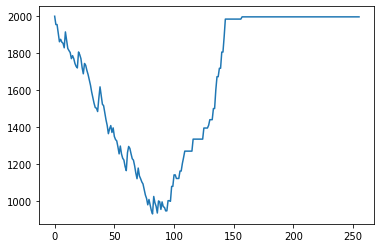

In [12]:
plt.plot(cantidad_de_billetes)
plt.show()

## 1.d

In [13]:
np.mean(t_en_el_sistema)

142.81392358036385

## 1.e

In [14]:
cantidad_transacciones/cantidad_clientes * 100

42.607529385466535

In [15]:
class CajeroConReciclaje:
    def __init__(self):
        self.capacidad = 2000
        self.compartimiento_unico = 0

    def depositar(self, cantidad):
        if self.compartimiento_unico + cantidad <= self.capacidad:
            self.compartimiento_unico += cantidad
            return True
        return False

    def retirar(self, cantidad):
        if self.compartimiento_unico - cantidad >= 0:
            self.compartimiento_unico -= cantidad
            return True
        return False

    def get_cantidad_billetes_actual(self):
        return self.compartimiento_unico


In [16]:
cantidad_transacciones = 0
cantidad_clientes = 0

dia = 24*60*60
for i in range(1000):
    cajero = CajeroConReciclaje()
    # t: tiempo acumulado
    t = 0

    while t <= dia:
        # arribo un cliente: tiempo entre clientes sigue una distribucion exponencial de media 180
        t1 = sp.expon.rvs(0, 180)
        t += t1
        # u: para decidir si el cliente que arribo es del grupo 1 o grupo 2
        u = random()
        if u <= 0.75: # grupo 1
            # el cliente usa el cajero
            t2 = sp.expon.rvs(0, 90)
            t_en_el_sistema.append(t2)
            t += t2
            # el cliente retira dinero
            cantidad_a_retirar = uniform(3, 50)
            pudo_retirar = cajero.retirar(cantidad_a_retirar)
            if pudo_retirar:
                cantidad_transacciones += 1
        else: # grupo 2
            # el cliente usa el cajero
            t2 = sp.expon.rvs(0, 300)
            t_en_el_sistema.append(t2)
            t += t2
            # el cliente deposita dinero
            cantidad_a_depositar = uniform(10, 100)
            pudo_depositar = cajero.depositar(cantidad_a_depositar)
            if pudo_depositar:
                cantidad_transacciones += 1

        cantidad_clientes += 1


In [17]:
cantidad_transacciones/cantidad_clientes * 100

78.49536855983999

# Ejercicio 2

## 2.a

In [18]:
P = np.array([ [39/40, 1/40], [1/30, 29/30] ])

## 2.b

In [40]:
from random import random

cantidad_solicitudes = 0
estados = [cantidad_solicitudes]
veces_cero_solicitudes = 1

N = int(1000/0.01)
for i in range(1, N+1):
    u = random()
    if cantidad_solicitudes == 0:
        if u < 1/40: # ingresa una solicitud
            cantidad_solicitudes += 1
        else:
            veces_cero_solicitudes += 1
    else:
        prob_no_ingresa_solicitud_y_siga_procesando = (39/40)*(29/30) + (1/40)*(1/30)
        prob_ingresa_solicitud_y_siga_procesando = (1/40)*(29/30)
        prob_no_ingresa_solicitud_y_termina_procesar = (39/40)*(1/30)
        if u < prob_no_ingresa_solicitud_y_termina_procesar: # no ingreso solicitud y termina de procesar
            cantidad_solicitudes -= 1
        elif prob_no_ingresa_solicitud_y_termina_procesar <= u < prob_no_ingresa_solicitud_y_termina_procesar+prob_ingresa_solicitud_y_siga_procesando: # ingresa solicitud y sigue procesando
            cantidad_solicitudes += 1
        else: # si no ingresa solicitud y sigue procesando o si ingresa solicitud y termino de procesar
              # la cantidad de solicitudes se mantiene
            pass

    estados.append(cantidad_solicitudes)


## 2.c

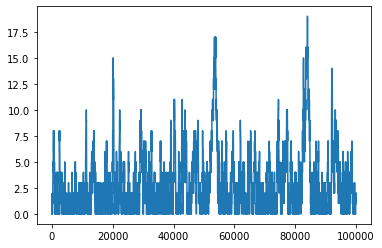

In [41]:
#plt.rcParams["figure.figsize"] = (25,15)

plt.plot(estados)
plt.show()

## 2.d

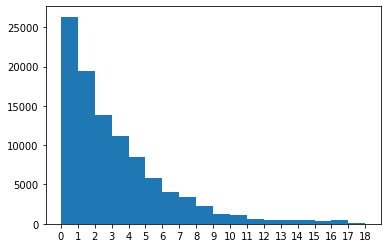

In [42]:
plt.xticks(np.arange(0, max(estados), step=1))
plt.hist(estados, np.arange(0, max(estados), step=1))
plt.show()

## 2.e

In [43]:
veces_cero_solicitudes / N * 100

25.712000000000003

# Ejercicio 3

In [44]:
def simular_precio(a, b, c, d, P0):
    precios = [P0]

    Pt_ant = P0
    for i in range(100):
        Qt = d * Pt_ant - c
        Pt = (a/b) - (1/b)*Qt
        
        precios.append(Pt)
        Pt_ant = Pt
    
    plt.plot(precios)
    plt.show

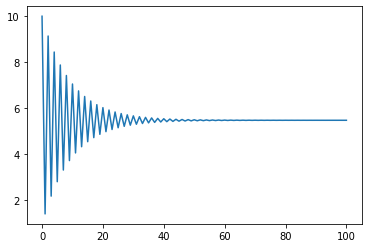

In [46]:
# parametros (a)
simular_precio(10, 1, 0.4, 0.9, 10)

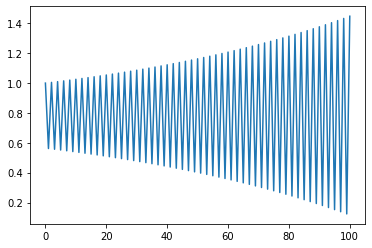

In [48]:
# parametros (b)
simular_precio(0.9, 0.89, 0.5, 0.9, 1)